In [30]:
import numpy as np
import glob
import os
import nilearn.plotting
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
## the location of the adjacency matices to plot..
plotsdir = '/home/edickie/code/abide-PINT/plots/'
adj_csvs = glob.glob('{}/*DXadjCohenD*.csv'.format(plotsdir))
adj_csvs

['/home/edickie/code/abide-PINT/plots/abideI_DXadjCohenD_tvertex_fdr0.05.csv',
 '/home/edickie/code/abide-PINT/plots/abideI_DXadjCohenD_ivertex_fdr0.05.csv']

In [32]:
## read in the csv that includes node coordinates and mapping
Yeo80df  = pd.read_csv('/home/edickie/code/abide-PINT/phenotypic_and_qc/Yeo7_80verts_201610.csv')

In [33]:
def Yeo_colors(roinames):
    ''' return a list of hex codes for the Yeo 7 networks'''
    node_colors = []
    for roi in roinames:
      if roi[0:2]=='V1': node_colors.append("#781286")
      if roi[0:2]=='DA': node_colors.append("#00760E")
      if roi[0:2]=='SA': node_colors.append("#C43AFA")
      if roi[0:2]=='SM': node_colors.append("#4682B4")
      if roi[0:2]=='EX': node_colors.append("#E69422")
      if roi[0:2]=='DM': node_colors.append("#CD3E3A")
    return(node_colors)

In [34]:
def YeoPINT_template_coords(roinames):
    adj_coord = []
    for roi in roinames:
        thesecoords = tuple(Yeo80df.loc[Yeo80df['SHORTNAME']==roi, ['x','y','z']].values[0])
        adj_coord.append(thesecoords)
    return(adj_coord)

In [29]:
## read in the adjaendcy matrix using pandas
edgethr='fdr0.05'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        adj_res = pd.read_csv(os.path.join(plotsdir, 
                                           'abideI_DXadjCohenD_{}_{}.csv'.format(vertextype,edgethr)))
        outpng = os.path.join(plotsdir, 'abideI_DXadjCohenD_{}_{}.png'.format(vertextype,edgethr))
        rois = adj_res.columns.tolist()
        adj_res = adj_res*-1
        nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                         YeoPINT_template_coords(rois),
                                         node_color = Yeo_colors(rois),
                                         display_mode='xz',
                                        edge_vmax = 0.30,
                                        edge_cmap = "RdBu",
                                        colorbar = True,
                                        output_file = outpng)

In [35]:
## read in the adjaendcy matrix using pandas
edgethr='fdr0.05'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        adj_res = pd.read_csv(os.path.join(plotsdir, 
                                           'abideI_DXadjCohenD_{}_{}.csv'.format(vertextype,edgethr)))
        outpng = os.path.join(plotsdir, 'abideI_DXadjCohenD_{}_{}.svg'.format(vertextype,edgethr))
        rois = adj_res.columns.tolist()
        adj_res = adj_res*-1
        nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                         YeoPINT_template_coords(rois),
                                         node_color = Yeo_colors(rois),
                                         display_mode='xz',
                                        edge_vmax = 0.30,
                                        edge_cmap = "RdBu",
                                        colorbar = True,
                                        output_file = outpng)

/home/edickie/code/abide-PINT/plots/abideI_DXadjacency_tvertexhypo0.001.csv
/home/edickie/code/abide-PINT/plots/abideI_DXadjacency_ivertexhypo0.001.csv
/home/edickie/code/abide-PINT/plots/abideI_DXadjacency_ivertexhyper0.001.csv


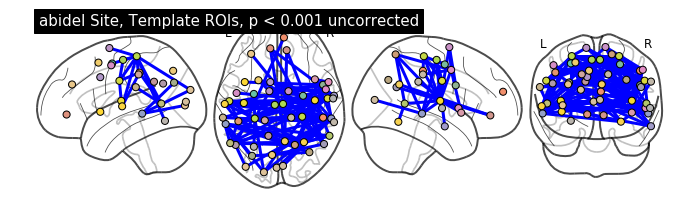

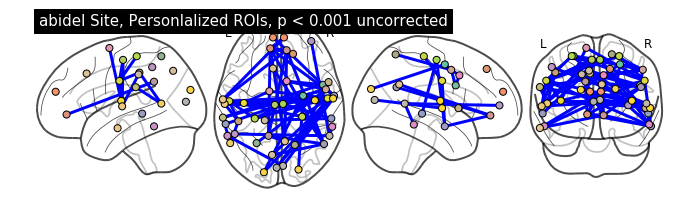

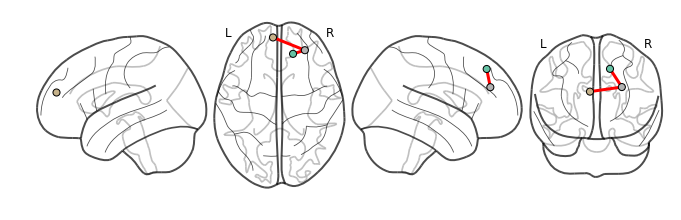

In [21]:
## read in the adjaendcy matrix using pandas
edgethr='0.001'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        for hypo_hyper in ['hypo','hyper']:
            if (vertextype == 'tvertex') & (hypo_hyper == "hyper"):
                continue
            adj_csv = os.path.join(plotsdir, 
                                   '{}_DXadjacency_{}{}{}.csv'.format(site,vertextype, hypo_hyper, edgethr))
            print(adj_csv)
            adj_res = pd.read_csv(adj_csv)
            rois = adj_res.columns.tolist()

            if hypo_hyper == 'hypo': 
                adj_res = adj_res*-1
                plottitle= '{} Site, {} ROIs, p < {} uncorrected'.format(site, vtitle, edgethr)
            else:
                plottitle=''
            nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                             YeoPINT_template_coords(rois), 
                                             display_mode='lzry',
                                             title = plottitle)




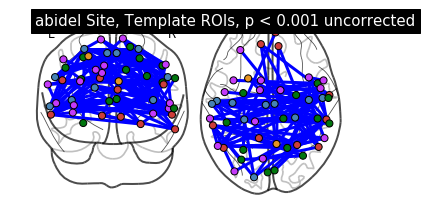

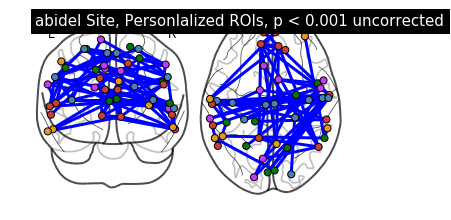

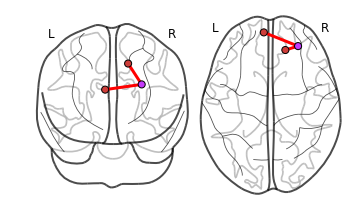

In [23]:
## read in the adjaendcy matrix using pandas
edgethr='0.001'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        for hypo_hyper in ['hypo','hyper']:
            if (vertextype == 'tvertex') & (hypo_hyper == "hyper"):
                continue
            adj_res = pd.read_csv(os.path.join(plotsdir, 
                                               '{}_DXadjacency_{}{}{}.csv'.format(site,vertextype, hypo_hyper, edgethr)))
            rois = adj_res.columns.tolist()

            if hypo_hyper == 'hypo': 
                adj_res = adj_res*-1
                plottitle= '{} Site, {} ROIs, p < {} uncorrected'.format(site, vtitle, edgethr)
            else:
                plottitle=''
            nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                             YeoPINT_template_coords(rois),
                                             node_color = Yeo_colors(rois),
                                             display_mode='yz',
                                             title = plottitle)

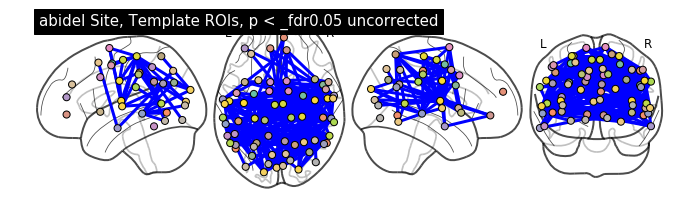

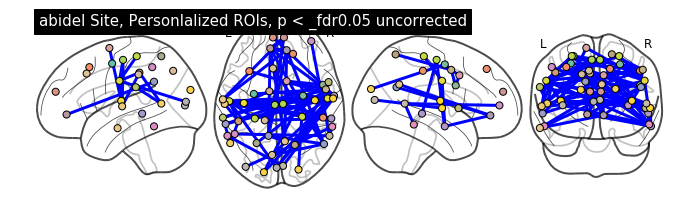

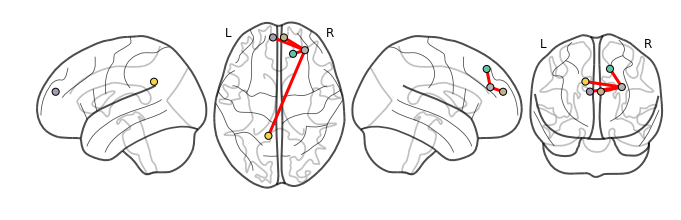

In [25]:
## read in the adjaendcy matrix using pandas
edgethr='_fdr0.05'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        for hypo_hyper in ['hypo','hyper']:
            if (vertextype == 'tvertex') & (hypo_hyper == "hyper"):
                continue
            adj_res = pd.read_csv(os.path.join(plotsdir, 
                                               '{}_DXadjacency_{}{}{}.csv'.format(site,vertextype, hypo_hyper, edgethr)))
            rois = adj_res.columns.tolist()

            if hypo_hyper == 'hypo': 
                adj_res = adj_res*-1
                plottitle= '{} Site, {} ROIs, p < {} uncorrected'.format(site, vtitle, edgethr)
            else:
                plottitle=''
            nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                             YeoPINT_template_coords(rois), 
                                             display_mode='lzry',
                                             title = plottitle)

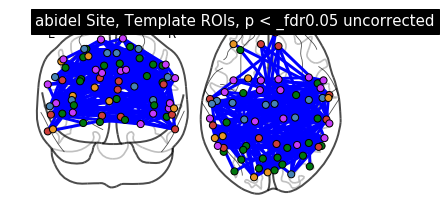

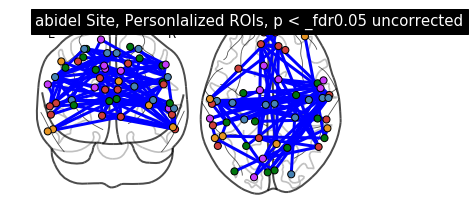

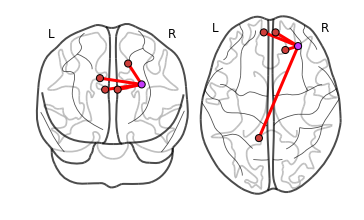

In [28]:
## read in the adjaendcy matrix using pandas
edgethr='_fdr0.05'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        for hypo_hyper in ['hypo','hyper']:
            if (vertextype == 'tvertex') & (hypo_hyper == "hyper"):
                continue
            adj_res = pd.read_csv(os.path.join(plotsdir, 
                                               '{}_DXadjacency_{}{}{}.csv'.format(site,vertextype, hypo_hyper, edgethr)))
            rois = adj_res.columns.tolist()

            if hypo_hyper == 'hypo': 
                adj_res = adj_res*-1
                plottitle= '{} Site, {} ROIs, p < {} uncorrected'.format(site, vtitle, edgethr)
            else:
                plottitle=''
            nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                             YeoPINT_template_coords(rois),
                                             node_color = Yeo_colors(rois),
                                             display_mode='yz',
                                             title = plottitle)

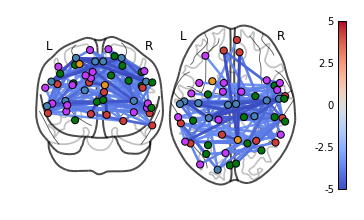

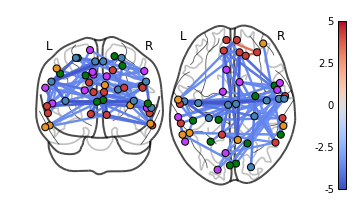

In [72]:
## read in the adjaendcy matrix using pandas
edgethr='_0.001'

for site in ['abideI']:
    for vertextype, vtitle in (['tvertex','Template'],['ivertex','Personlalized']):
        adj_res = pd.read_csv(os.path.join(plotsdir, 
                                           '{}_DXadjacency_{}both{}.csv'.format(site,vertextype,edgethr)))
        rois = adj_res.columns.tolist()
        adj_res = adj_res * -1.00
        nilearn.plotting.plot_connectome(adj_res.as_matrix(),
                                         YeoPINT_template_coords(rois),
                                         node_color = Yeo_colors(rois),
                                         display_mode='yz',
                                         edge_vmax = 5,
                                         edge_cmap = "coolwarm",
                                        colorbar = True)


In [56]:
adj_res['VAF5L']

0    -0.000000
1    -0.000000
2    -0.000000
3    -0.000000
4    -0.000000
5    -0.000000
6    -0.000000
7    -0.000000
8    -0.000000
9    -0.000000
10   -0.000000
11   -0.000000
12   -0.000000
13   -1.641434
14   -0.000000
15   -0.000000
16   -0.000000
17   -0.000000
18   -0.000000
19   -0.000000
20   -0.000000
21   -0.000000
22   -0.000000
23   -0.000000
24   -0.000000
25   -0.000000
26   -0.000000
27   -0.000000
28   -0.000000
29   -0.000000
30   -0.000000
31   -0.000000
32   -0.000000
33   -0.000000
34   -0.000000
35   -0.000000
36   -0.000000
37   -0.000000
38   -0.000000
39   -0.000000
40   -0.000000
41   -0.000000
42   -0.000000
43   -0.000000
44   -0.000000
45   -0.000000
46   -0.000000
47   -0.000000
48   -0.000000
49   -0.000000
50   -0.000000
Name: VAF5L, dtype: float64